# Classifying Handwritten Digits with TensorFlow

Classifying handwritten digits is the basic problem of the machine learning and can be solved in many ways here we will implement them by using TensorFlow
Using a Linear Classifier Algorithm with tf.contrib.learn
linear classifier achieves the classification of handwritten digits by making a choice based on the value of a linear combination of the features also known as feature values and is typically presented to the machine in a vector called a feature vector.

# Steps to follow
### Step 1 : Importing all dependence

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

### Step 2 : Load the MNIST dataset directly from keras.datasets

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


after this step a dataset of mnist will be downloaded.

### Steps 3: Making dataset
Convert data to float32 and normalize pixel values

In [4]:
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

In [5]:
# Display function remains the same

def display(i):
  img = test_images[i]
  plt.title('label " {}'.format(test_labels[i]))
  plt.imshow(img, cmap = 'gray')
  plt.show()

### Step 4 : Displaying dataset using MatplotLib

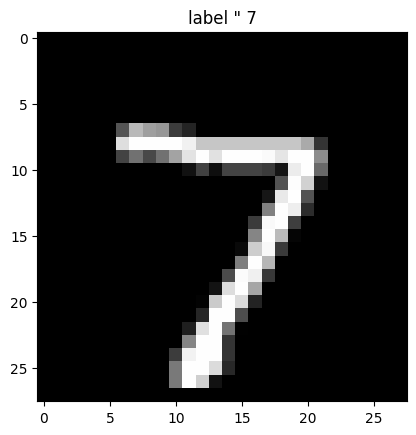

In [6]:
# Display an example
display(0)

### Use Sequential model for simplicity

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Compile the model

In [8]:
model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Train the model

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 5s 6ms/step - loss: 0.6175 - accuracy: 0.8458
Epoch 2/5
600/600 [==============================] - 6s 10ms/step - loss: 0.3449 - accuracy: 0.9061
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.3087 - accuracy: 0.9150
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.2919 - accuracy: 0.9193
Epoch 5/5
600/600 [==============================] - 3s 5ms/step - loss: 0.2813 - accuracy: 0.9218


### Evaluate accuracy

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest Accuracy: ', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.2744 - accuracy: 0.9244

Test Accuracy:  0.9243999719619751


### Make predictions

In [11]:
predictions = model.predict(test_images)
prediction = np.argmax(predictions[0])

print('Prediction:', prediction, 'Label:', test_labels[0])

313/313 [==============================] - 1s 2ms/step
Prediction: 7 Label: 7


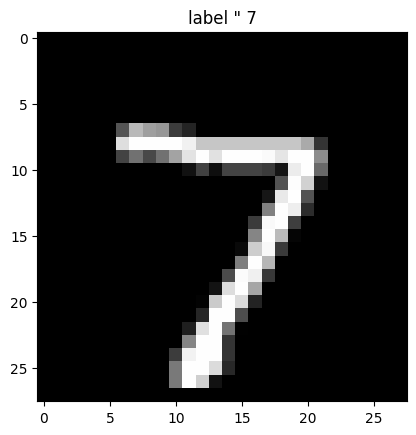

In [12]:
if prediction == test_labels[0]:
  display(0)

# Using Deep learning with tf.keras

Deep learning is a subpart of machine learning and artificial intelligence which is also known as deep neural network this networks capable of learning unsupervised from provided data which is unorganized or unlabeled. today, we will implement a neural network in TensorFlow to classify handwritten digit.

In [13]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Normalize the data using NumPy

In [14]:
X_train = x_train / 255.0
X_test = x_test / 255.0

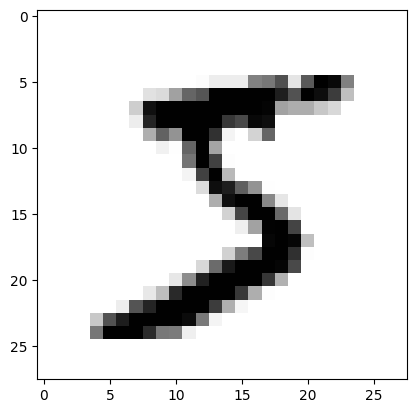

In [15]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

### Make a neural network and train it

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer ='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7549 - accuracy: 0.8760
Epoch 2/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3877 - accuracy: 0.9245
Epoch 3/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2344 - accuracy: 0.9432


### Check model accuracy and loss

In [21]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print("loss-> ", val_loss, "\nacc-> ", val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2253 - accuracy: 0.9462
loss->  0.22532080113887787 
acc->  0.9462000131607056


In [22]:
predictions = model.predict(x_test)
print('Loss ->', y_test[2])
print('Predictions ->', np.argmax(predictions[2]))

313/313 [==============================] - 2s 6ms/step
Loss -> 1
Predictions -> 1


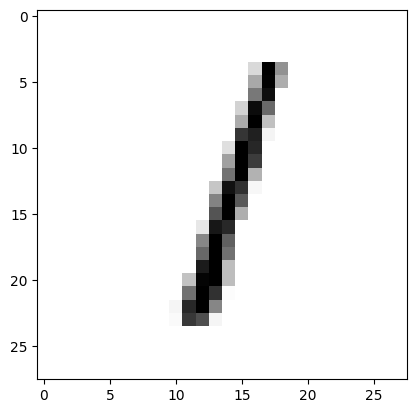

In [23]:
plt.imshow(x_test[2], cmap=plt.cm.binary)
plt.show()

### Saving and loading the model

In [24]:
model.save('epic_num_readers.h5')
new_model = tf.keras.models.load_model('epic_num_readers.h5')
predictions = new_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 4ms/step


In [26]:
print("Labels ->", y_test[2])
print('Prediction ->', np.argmax(predictions[2]))

Labels -> 1
Prediction -> 1


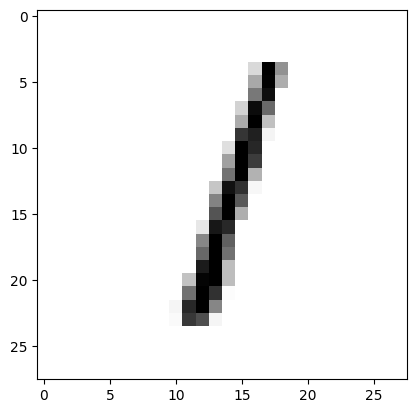

In [27]:
plt.imshow(x_test[2], cmap=plt.cm.binary)
plt.show()